In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [2]:
df_geo = pd.read_csv('../data_tables/geo_technology_species.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_geo

,Accession,Series Type,Taxonomy
0,GSE1,Expression profiling by array,Homo sapiens
1,GSE2,Expression profiling by array,Mus musculus
2,GSE3,Expression profiling by array,Homo sapiens
3,GSE4,Expression profiling by array,Arabidopsis thaliana
4,GSE5,Expression profiling by array,Caenorhabditis elegans
...,...,...,...
118670,GSE137106,Expression profiling by high throughput sequen...,Homo sapiens
118671,GSE137458,Non-coding RNA profiling by high throughput se...,Mus musculus
118672,GSE137562,Expression profiling by high throughput sequen...,Rattus norvegicus
118673,GSE137563,Non-coding RNA profiling by high throughput se...,Mus musculus;Rattus norvegicus


In [3]:
df_geo.columns = ['GEOSeries','Technology','Species']
df_geo

,GEOSeries,Technology,Species
0,GSE1,Expression profiling by array,Homo sapiens
1,GSE2,Expression profiling by array,Mus musculus
2,GSE3,Expression profiling by array,Homo sapiens
3,GSE4,Expression profiling by array,Arabidopsis thaliana
4,GSE5,Expression profiling by array,Caenorhabditis elegans
...,...,...,...
118670,GSE137106,Expression profiling by high throughput sequen...,Homo sapiens
118671,GSE137458,Non-coding RNA profiling by high throughput se...,Mus musculus
118672,GSE137562,Expression profiling by high throughput sequen...,Rattus norvegicus
118673,GSE137563,Non-coding RNA profiling by high throughput se...,Mus musculus;Rattus norvegicus


In [4]:
df_geo_count = pd.read_csv('../data_tables/GEOSeries_count.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_geo_count 

,Unnamed: 0,Count,Count.1
0,0,GSE1,61
1,1,GSE10,2
2,2,GSE100,1
3,3,GSE1000,1
4,4,GSE10000,4
...,...,...,...
44734,44734,GSE99990,1
44735,44735,GSE99991,1
44736,44736,GSE99992,2
44737,44737,GSE99993,1


In [5]:
df_geo_count = df_geo_count.drop(df_geo_count.columns[[0]], axis=1)
df_geo_count

,Count,Count.1
0,GSE1,61
1,GSE10,2
2,GSE100,1
3,GSE1000,1
4,GSE10000,4
...,...,...
44734,GSE99990,1
44735,GSE99991,1
44736,GSE99992,2
44737,GSE99993,1


In [6]:
df_geo_count.columns = ['GEOSeries','Count']
df_geo_count

,GEOSeries,Count
0,GSE1,61
1,GSE10,2
2,GSE100,1
3,GSE1000,1
4,GSE10000,4
...,...,...
44734,GSE99990,1
44735,GSE99991,1
44736,GSE99992,2
44737,GSE99993,1


In [7]:
#df_geo_count = df_geo_count[df_geo_count['Count'] > 1]#reuse counts
#df_geo_count

In [8]:
df_combined=pd.merge(df_geo, df_geo_count, on="GEOSeries")
df_combined

,GEOSeries,Technology,Species,Count
0,GSE1,Expression profiling by array,Homo sapiens,61
1,GSE2,Expression profiling by array,Mus musculus,11
2,GSE3,Expression profiling by array,Homo sapiens,11
3,GSE4,Expression profiling by array,Arabidopsis thaliana,9
4,GSE5,Expression profiling by array,Caenorhabditis elegans,21
...,...,...,...,...
44531,GSE67888,Expression profiling by array;Non-coding RNA p...,Mus musculus;synthetic construct,1
44532,GSE87560,Expression profiling by high throughput sequen...,Homo sapiens,1
44533,GSE104272,Expression profiling by array,Homo sapiens,1
44534,GSE120376,in the pluripotent state and after induced di...,Expression profiling by high throughput sequen...,1


In [9]:
df_combined = df_combined.drop(df_combined.columns[[0,1]], axis=1)
df_combined

,Species,Count
0,Homo sapiens,61
1,Mus musculus,11
2,Homo sapiens,11
3,Arabidopsis thaliana,9
4,Caenorhabditis elegans,21
...,...,...
44531,Mus musculus;synthetic construct,1
44532,Homo sapiens,1
44533,Homo sapiens,1
44534,Expression profiling by high throughput sequen...,1


In [10]:
df_geo_species=df_combined.groupby('Species').agg({'Count':'sum'}).reset_index().rename(columns={'Species':"Count"})
df_geo_species

,Count,Count
0,Combination of the individual compounds (Com...,1
1,Flt3/ITD transfected KSL cells and nontransf...,1
2,"with cisplatin""",1
3,(3) Schwann cells (Nf1-/-) and macrophages (N...,1
4,"(WT)] Saccharomyces cerevisiae yeast cells""",1
...,...,...
3749,uncultured marine microorganism,1
3750,unidentified herpesvirus,1
3751,unidentified influenza virus,1
3752,binds to and activates super-enhancers [ChIP-...,2


In [11]:
df_geo_species.columns = ['Species','Count']
df_geo_species

,Species,Count
0,Combination of the individual compounds (Com...,1
1,Flt3/ITD transfected KSL cells and nontransf...,1
2,"with cisplatin""",1
3,(3) Schwann cells (Nf1-/-) and macrophages (N...,1
4,"(WT)] Saccharomyces cerevisiae yeast cells""",1
...,...,...
3749,uncultured marine microorganism,1
3750,unidentified herpesvirus,1
3751,unidentified influenza virus,1
3752,binds to and activates super-enhancers [ChIP-...,2


In [12]:
Total = df_geo_species['Count'].sum()
print (Total)

91763


In [13]:
df_geo_species['Percentage']=(df_geo_species['Count']/91763)*100
df_geo_species

,Species,Count,Percentage
0,Combination of the individual compounds (Com...,1,0.00109
1,Flt3/ITD transfected KSL cells and nontransf...,1,0.00109
2,"with cisplatin""",1,0.00109
3,(3) Schwann cells (Nf1-/-) and macrophages (N...,1,0.00109
4,"(WT)] Saccharomyces cerevisiae yeast cells""",1,0.00109
...,...,...,...
3749,uncultured marine microorganism,1,0.00109
3750,unidentified herpesvirus,1,0.00109
3751,unidentified influenza virus,1,0.00109
3752,binds to and activates super-enhancers [ChIP-...,2,0.00218


In [14]:
df_geo_species = df_geo_species[df_geo_species['Percentage'] > 5]#remove percentage that less than 5, find out it was homo sapiens and mus musculus
df_geo_species

,Species,Count,Percentage
2479,Homo sapiens,50181,54.685440
2814,Mus musculus,14372,15.662086


<Figure size 2880x1800 with 0 Axes>

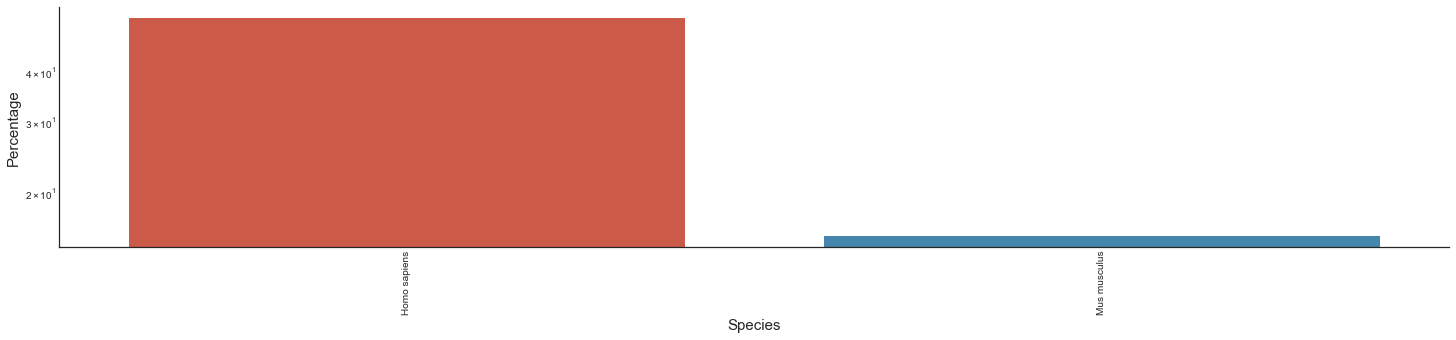

In [15]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='Species', y='Percentage', data=df_geo_species,
            height=4,aspect=5,kind='bar')
sns.despine()

# set axis labels
ax.axes[0,0].set_xlabel('Species', fontsize = 15)
ax.axes[0,0].set_ylabel('Percentage', fontsize = 15)
plt.xticks(rotation=90)
plt.yscale('log')

#save to .png
#ax.savefig('Reuse_by_species_GEO.png', dpi = 200, bbox_inches = 'tight', transparent = False)

In [16]:
df_combined=df_combined.loc[df_combined['Species'].isin(['Homo sapiens','Mus musculus'])]
df_combined

,Species,Count
0,Homo sapiens,61
1,Mus musculus,11
2,Homo sapiens,11
9,Homo sapiens,2
10,Mus musculus,5
...,...,...
44529,Mus musculus,1
44530,Homo sapiens,1
44532,Homo sapiens,1
44533,Homo sapiens,1


In [18]:
df_human = df_combined[df_combined.Species == 'Homo sapiens']
df_human

,Species,Count
0,Homo sapiens,61
2,Homo sapiens,11
9,Homo sapiens,2
14,Homo sapiens,4
15,Homo sapiens,7
...,...,...
44527,Homo sapiens,1
44528,Homo sapiens,2
44530,Homo sapiens,1
44532,Homo sapiens,1


In [21]:
df_human_reuse = df_human[df_human.Count != 1]
df_human_reuse

,Species,Count
0,Homo sapiens,61
2,Homo sapiens,11
9,Homo sapiens,2
14,Homo sapiens,4
15,Homo sapiens,7
...,...,...
43385,Homo sapiens,2
43740,Homo sapiens,2
44118,Homo sapiens,2
44386,Homo sapiens,2


In [24]:
df_human_reuse['Count']=df_human_reuse['Count']-1
df_human_reuse

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Species,Count
0,Homo sapiens,60
2,Homo sapiens,10
9,Homo sapiens,1
14,Homo sapiens,3
15,Homo sapiens,6
...,...,...
43385,Homo sapiens,1
43740,Homo sapiens,1
44118,Homo sapiens,1
44386,Homo sapiens,1


In [22]:
df_mouse = df_combined[df_combined.Species == 'Mus musculus']
df_mouse

,Species,Count
1,Mus musculus,11
10,Mus musculus,5
11,Mus musculus,1
13,Mus musculus,5
34,Mus musculus,3
...,...,...
44521,Mus musculus,1
44522,Mus musculus,1
44526,Mus musculus,1
44529,Mus musculus,1


In [23]:
df_mouse_reuse = df_mouse[df_mouse.Count != 1]
df_mouse_reuse

,Species,Count
1,Mus musculus,11
10,Mus musculus,5
13,Mus musculus,5
34,Mus musculus,3
45,Mus musculus,2
...,...,...
42187,Mus musculus,2
42264,Mus musculus,2
42290,Mus musculus,2
42610,Mus musculus,2


In [25]:
df_mouse_reuse['Count']=df_mouse_reuse['Count']-1
df_mouse_reuse

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Species,Count
1,Mus musculus,10
10,Mus musculus,4
13,Mus musculus,4
34,Mus musculus,2
45,Mus musculus,1
...,...,...
42187,Mus musculus,1
42264,Mus musculus,1
42290,Mus musculus,1
42610,Mus musculus,1


In [27]:
df_combined_reuse = df_human_reuse.append(df_mouse_reuse, ignore_index=True)
df_combined_reuse

,Species,Count
0,Homo sapiens,60
1,Homo sapiens,10
2,Homo sapiens,1
3,Homo sapiens,3
4,Homo sapiens,6
...,...,...
8208,Mus musculus,1
8209,Mus musculus,1
8210,Mus musculus,1
8211,Mus musculus,1


<Figure size 2880x1800 with 0 Axes>

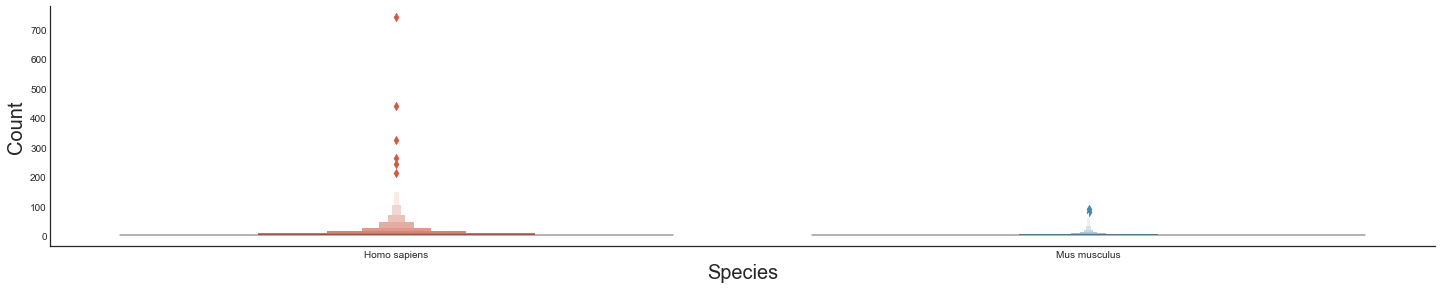

In [30]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='Species', y='Count', data=df_combined_reuse,
            height=4,aspect=5,kind='boxen')
sns.despine()

# set axis labels
ax.axes[0,0].set_xlabel('Species', fontsize = 20)
ax.axes[0,0].set_ylabel('Count', fontsize = 20)
#plt.yscale('log')

#save to .png
ax.savefig('Reuse_by_species_GEO.png', dpi = 200, bbox_inches = 'tight', transparent = False)